https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. 

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). 
X12 = amount of bill statement in September, 2005; 
X13 = amount of bill statement in August, 2005; . . .; 
X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). 
X18 = amount paid in September, 2005; 
X19 = amount paid in August, 2005; . . .;
X23 = amount paid in April, 2005.

Tujuan dari pemodelan ini adalah mencari tahu apakah customer gagal membayar kredit tepat waktu atau tidak

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
columns = ['Amount given Credit','Gender','Education','Marital Status',
           'Age','Repayment Sep','Repayment Aug','Repayment Jul','Repayment Jun',
           'Repayment May','Repayment Apr','Amount of Bill Sep','Amount of Bill Aug',
          'Amount of Bill Jul','Amount of Bill Jun','Amount of Bill May','Amount of Bill Apr',
          'Amount Prev Pay Sep','Amount Prev Pay Aug','Amount Prev Pay Jul','Amount Prev Pay Jun','Amount Prev Pay May',
          'Amount Prev Pay Apr','Default Payment']

dfraw = pd.read_excel('default of credit card clients.xls',header=1,index_col=0)
dfraw.columns=columns

In [3]:
dfraw.head()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount of Bill Jun,Amount of Bill May,Amount of Bill Apr,Amount Prev Pay Sep,Amount Prev Pay Aug,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
dfraw.describe()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount of Bill Jun,Amount of Bill May,Amount of Bill Apr,Amount Prev Pay Sep,Amount Prev Pay Aug,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
repcol = ['Repayment Sep','Repayment Aug','Repayment Jul','Repayment Jun','Repayment May','Repayment Apr']
billcol = ['Amount of Bill Sep','Amount of Bill Aug','Amount of Bill Jul','Amount of Bill Jun','Amount of Bill May','Amount of Bill Apr']
amountprevcol = ['Amount Prev Pay Sep','Amount Prev Pay Aug','Amount Prev Pay Jul','Amount Prev Pay Jun','Amount Prev Pay May','Amount Prev Pay Apr']

In [6]:
dfraw['Repayment Sep'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment Sep, dtype: int64

In [7]:
dfraw[repcol] = dfraw[repcol].replace({-1:0,-2:0})

In [8]:
#total Bill selama 6 bulan terakhir

def total_bill(df):
    temp = 0
    for i in billcol:
        temp+=df[i]
    return temp

dfraw['Total Bill'] = dfraw.apply(total_bill, axis=1)

In [9]:
#total yang sudah dibayar

def total_pay(df):
    temp = 0
    for i in amountprevcol:
        temp+= df[i]
    return temp

dfraw['Total Pay'] = dfraw.apply(total_pay,axis=1)

In [10]:
#berapa kali telat pembayaran

def late_count(df):
    temp = 0
    for i in repcol:
        if df[i] > 0:
            temp += 1
        else:
            temp += 0
    return temp


dfraw['Count Late'] = dfraw.apply(late_count, axis=1)

In [11]:
# rata rata telat perbulan

dfraw['Mean Pay Late'] = (dfraw['Repayment Sep'] + dfraw['Repayment Aug'] + dfraw['Repayment Jul'] + dfraw['Repayment Jun'] + dfraw['Repayment May'] + dfraw['Repayment Apr'])/6

In [13]:
dfraw['Debt'] = dfraw['Total Bill'] - dfraw['Total Pay']

def positif(df):
    if df<0:
        return 0
    else:
        return df
        
dfraw['Debt'] = dfraw['Debt'].apply(positif)

In [14]:
dfraw

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment,Total Bill,Total Pay,Count Late,Mean Pay Late,Debt
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,1,7704,689,2,0.666667,7015
2,120000,2,2,2,26,0,2,0,0,0,...,1000,1000,0,2000,1,17077,5000,2,0.666667,12077
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,101653,11018,0,0.000000,90635
4,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,231334,8388,0,0.000000,222946
5,50000,1,2,1,57,0,0,0,0,0,...,10000,9000,689,679,0,109339,59049,0,0.000000,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,5003,3047,5000,1000,0,725349,42550,0,0.000000,682799
29997,150000,1,3,2,43,0,0,0,0,0,...,8998,129,0,0,0,21182,14490,0,0.000000,6692
29998,30000,1,2,2,37,4,3,2,0,0,...,22000,4200,2000,3100,1,70496,31300,3,1.500000,39196


In [15]:
dfraw['Default Payment'].value_counts()

0    23364
1     6636
Name: Default Payment, dtype: int64

In [16]:
dfraw['Education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In [17]:
dfraw['Education'] = dfraw['Education'].replace({0:4,5:4,6:4})

In [18]:
dfraw['Marital Status'] = dfraw['Marital Status'].replace({0:3})

In [19]:
dfraw['Marital Status'].value_counts()

2    15964
1    13659
3      377
Name: Marital Status, dtype: int64

In [20]:
dfraw.to_csv('dfraw.csv',index=False)

In [21]:
dfraw.to_html("dataset.html",index=False) 

In [22]:
df = pd.read_csv('dfraw.csv')

In [23]:
df['Education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: Education, dtype: int64

In [24]:
df['Gender'] = df['Gender'].replace({1:'Male',2:'Female'})

In [25]:
df['Education'] = df['Education'].replace({1:'Graduate School',2:'University',3:'High School',4:'Others'})

In [26]:
df['Marital Status'] = df['Marital Status'].replace({1:'Married',2:'Single',3:'Others'})

In [27]:
df.to_csv('df.csv',index=False)

## EDA

In [28]:
df.head()

,Amount given Credit,Gender,Education,Marital Status,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,...,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment,Total Bill,Total Pay,Count Late,Mean Pay Late,Debt
0,20000,Female,University,Married,24,2,2,0,0,0,...,0,0,0,0,1,7704,689,2,0.666667,7015
1,120000,Female,University,Single,26,0,2,0,0,0,...,1000,1000,0,2000,1,17077,5000,2,0.666667,12077
2,90000,Female,University,Single,34,0,0,0,0,0,...,1000,1000,1000,5000,0,101653,11018,0,0.000000,90635
3,50000,Female,University,Married,37,0,0,0,0,0,...,1200,1100,1069,1000,0,231334,8388,0,0.000000,222946
4,50000,Male,University,Married,57,0,0,0,0,0,...,10000,9000,689,679,0,109339,59049,0,0.000000,50290


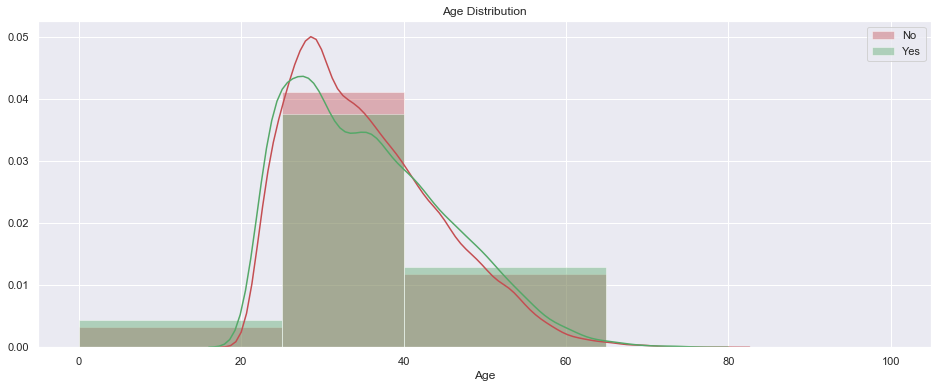

In [29]:
#melihat distribusi Given Credit
sns.set(style='darkgrid')

plt.figure(figsize=(16,6))
sns.distplot(df.Age[df['Default Payment'] == 0], bins=[0,25,40,65,100], color='r',label='No')
sns.distplot(df.Age[df['Default Payment'] == 1], bins=[0,25,40,65,100], color='g',label='Yes')
plt.legend()
plt.title('Age Distribution')
plt.savefig('Age Distribution.png')

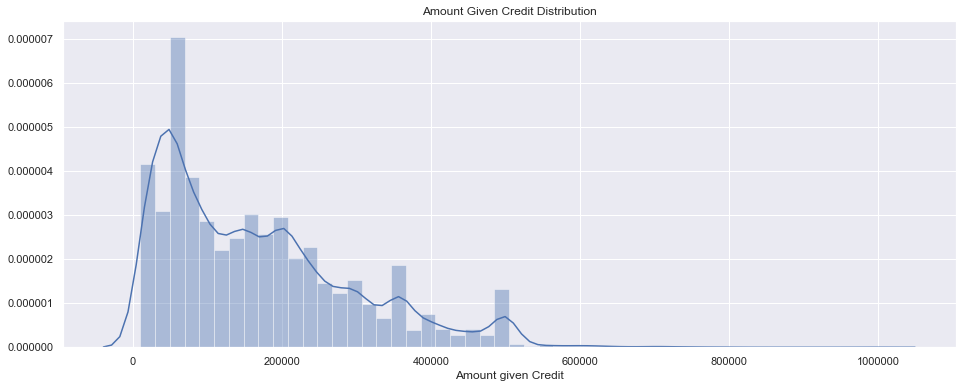

In [30]:
plt.figure(figsize=(16,6))
sns.distplot(df['Amount given Credit'])
plt.title('Amount Given Credit Distribution')
plt.savefig('Amount given credit distribution.png')

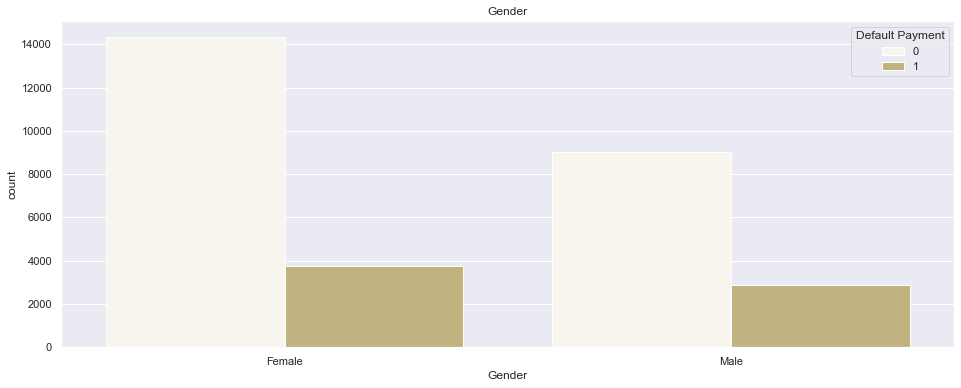

In [31]:
#melihat jumlah default payment berdasarkan gender

plt.figure(figsize=(16,6))
sns.countplot(df['Gender'],hue=df['Default Payment'],color='y')
plt.title('Gender')
plt.savefig('gender count.png')

In [32]:
df.describe()

,Amount given Credit,Age,Repayment Sep,Repayment Aug,Repayment Jul,Repayment Jun,Repayment May,Repayment Apr,Amount of Bill Sep,Amount of Bill Aug,...,Amount Prev Pay Jul,Amount Prev Pay Jun,Amount Prev Pay May,Amount Prev Pay Apr,Default Payment,Total Bill,Total Pay,Count Late,Mean Pay Late,Debt
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,...,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,3.000000e+04
mean,167484.322667,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,49179.075167,...,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,2.698617e+05,3.165139e+04,0.834200,0.281283,2.397048e+05
std,129747.661567,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,71173.768783,...,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,3.795643e+05,6.082768e+04,1.554303,0.601554,3.616494e+05
min,10000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,-3.362590e+05,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,50000.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,2984.750000,...,390.00000,296.000000,252.500000,117.750000,0.000000,2.868800e+04,6.679750e+03,0.000000,0.000000,4.520750e+03
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,21200.000000,...,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,1.263110e+05,1.438300e+04,0.000000,0.000000,1.019230e+05
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,64006.250000,...,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,3.426265e+05,3.350350e+04,1.000000,0.333333,3.057178e+05
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,...,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,5.263883e+06,3.764066e+06,6.000000,6.000000,4.116080e+06


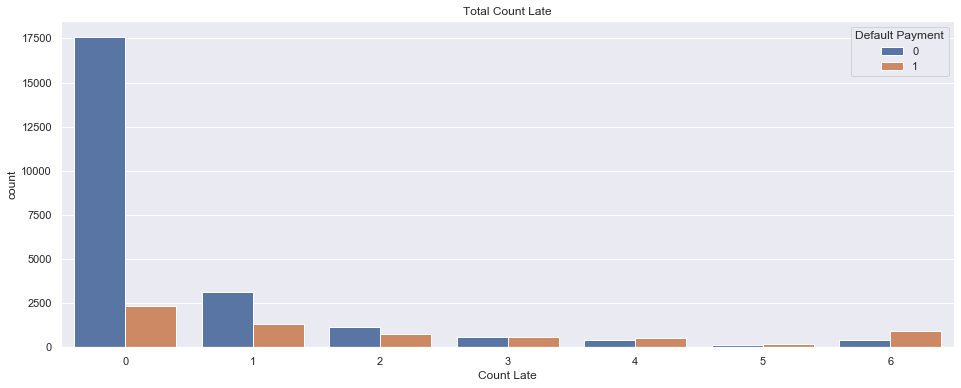

In [33]:
plt.figure(figsize=(16,6))
sns.countplot(df['Count Late'],hue=df['Default Payment'])
plt.title('Total Count Late')
plt.savefig('count late.png')

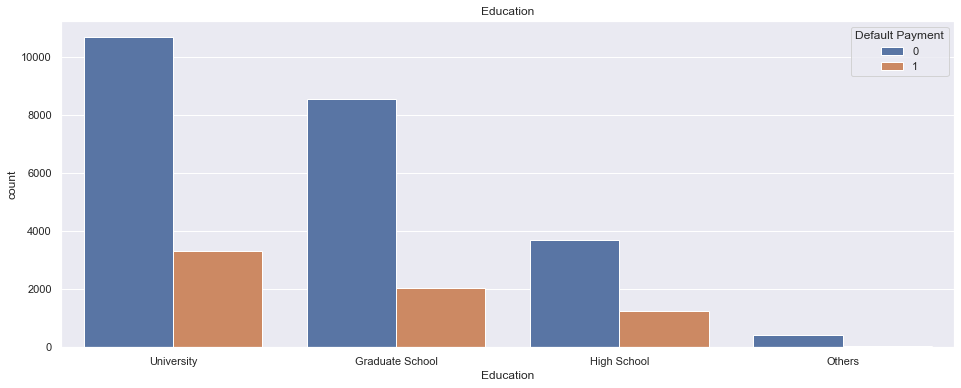

In [34]:
plt.figure(figsize=(16,6))
sns.countplot(df['Education'],hue=df['Default Payment'])
plt.title('Education')
plt.savefig('Education.png')

In [35]:
df['Age_Cat'] = pd.cut(df.Age,[0,25,40,65,100], labels=('Young','Adult','Old','Elder'))

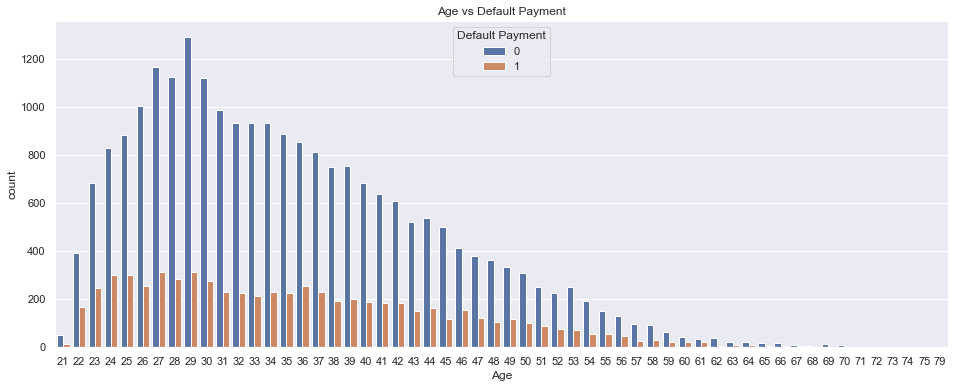

In [36]:
plt.figure(figsize=(16,6))
sns.countplot(df['Age'],hue=df['Default Payment'])
plt.title('Age vs Default Payment')
plt.savefig('Age Def Payment.png')

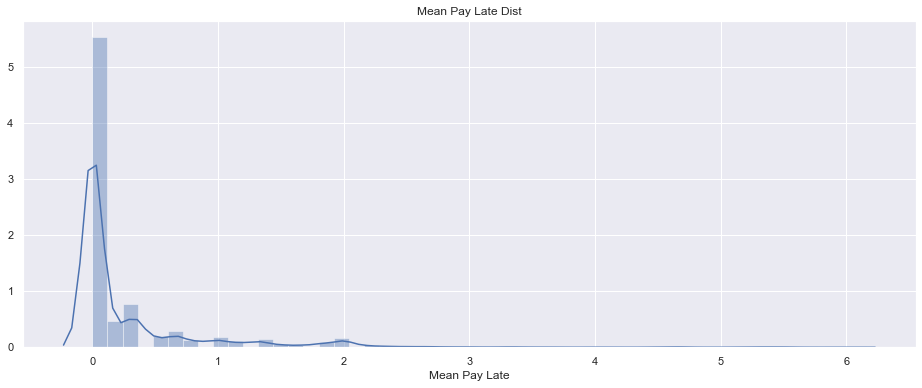

In [37]:
plt.figure(figsize=(16,6))
sns.distplot(df['Mean Pay Late'])
plt.title('Mean Pay Late Dist')
plt.savefig('Mean pay late dist.png')

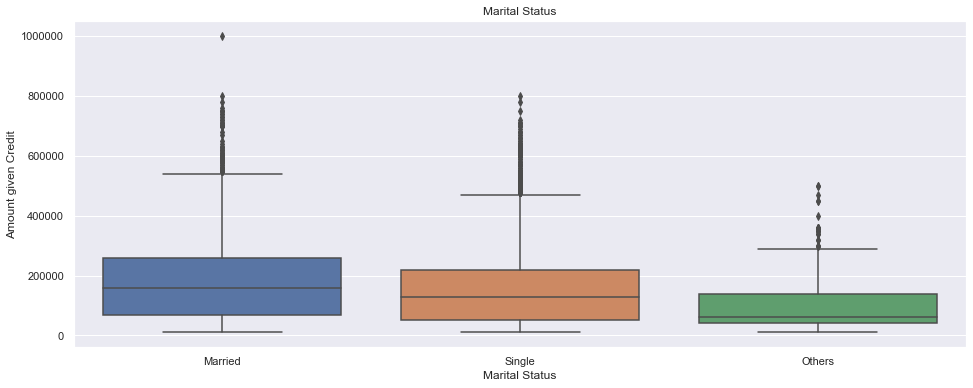

In [38]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x='Marital Status',y='Amount given Credit')
plt.title('Marital Status')
plt.savefig('Marital Status.png')